# Music and Healthcare


# Data Description

## Objectives
- EDA
- Statistical Testing and analysis
- ML model for prediction
- Complete summary of the project


## Data source
Music & Mental Health Survey Results  https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

In [2]:
# Read Data
data = pd.read_csv("mxmh_survey_results.csv")
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
# Check Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

# Exploratory Data Analysis (EDA)

## Statistical Summary

In [4]:
data.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


**Observations**
- Age:

Average age is approximately 25.2 years.
Age range: 10 to 89 years
.
- Hours per Day:

Average time spent listening to music is about 3.6 hours.
- Mental Health Scores (Scale: 0 to 10):

Average scores: Anxiety (5.84), Depression (4.80), Insomnia (3.74), OCD (2.64).
Indicates a range of mental health experiences.

## Visualization
### 1.Age distribution histogram

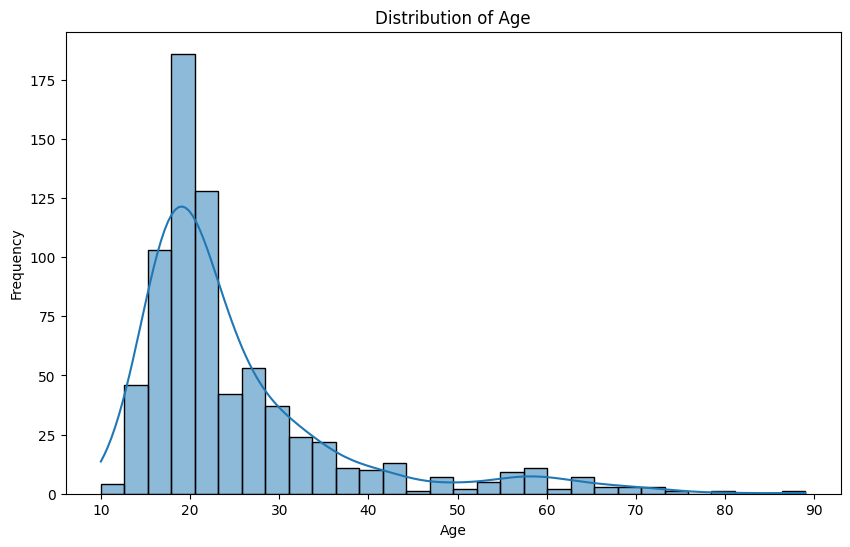

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Observations**

A significant portion of the respondents, ranging from 15 to 30 years old, indicates that the campaign was specifically designed to target young individuals.

### 2. Primary streaming platform distribution

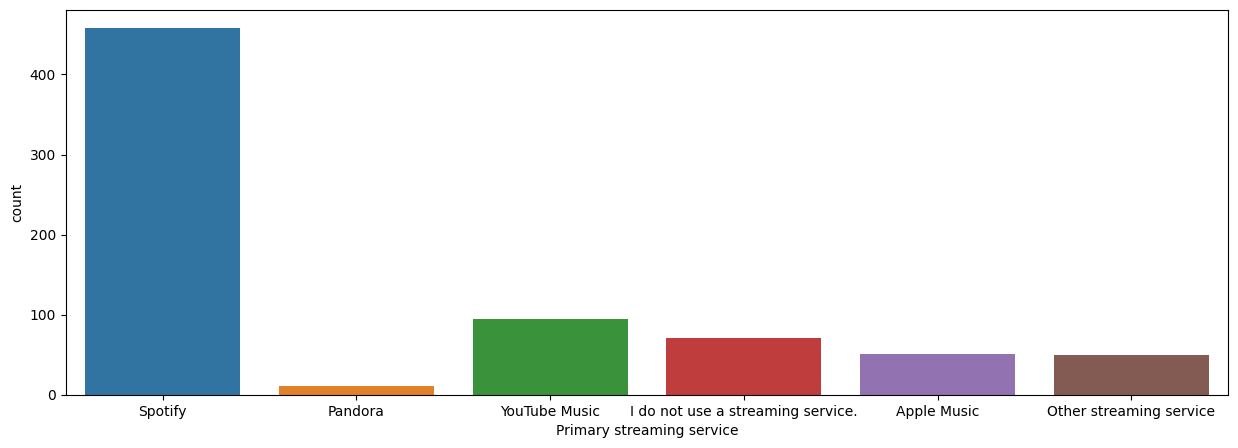

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,x="Primary streaming service")
plt.show()

In [7]:
data.groupby("Primary streaming service")["Age"].count()/data.shape[0]

Primary streaming service
Apple Music                          0.069293
I do not use a streaming service.    0.096467
Other streaming service              0.067935
Pandora                              0.014946
Spotify                              0.620924
YouTube Music                        0.127717
Name: Age, dtype: float64

**Observation:**

- The data reveals that a substantial majority of respondents, approximately 62.1%, favor using Spotify as their primary streaming platform. Apple Music and YouTube Music follow, accounting for 6.9% and 12.8% of users respectively. Other streaming services, Pandora, and respondents who do not use a streaming service constitute 6.8%, 1.5%, and 9.6% respectively. This indicates that Spotify is the most prevalent choice among the correspondents for their streaming needs

### 3. Distribution of 'While Working'


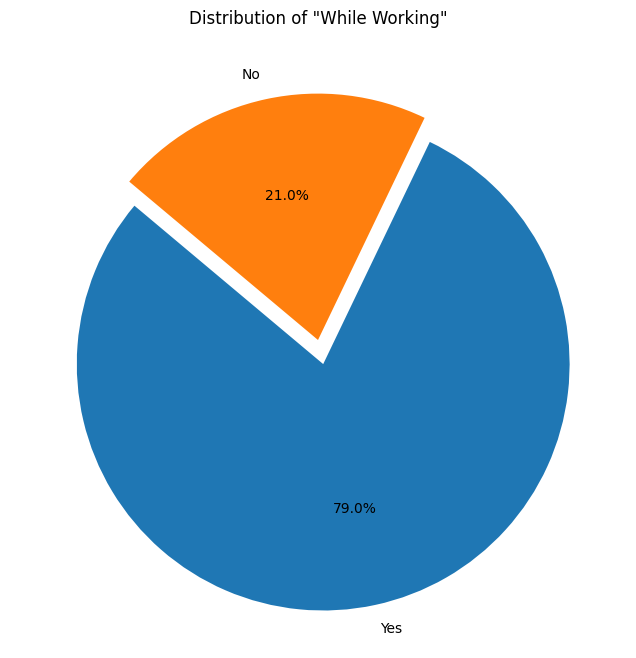

In [8]:
labels = ["Yes", "No"]
sizes = data["While working"].value_counts()
colors = ["#66b3ff","#99ff99"]
explode = (0.1, 0)  # explode the 1st slice (Yes)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',  startangle=140)
plt.title('Distribution of "While Working"')
plt.show()

**Observations**
- 79% of respondents prefer listening to music while working

### 4. Age vs. Hours Spent Listening to Music per Day

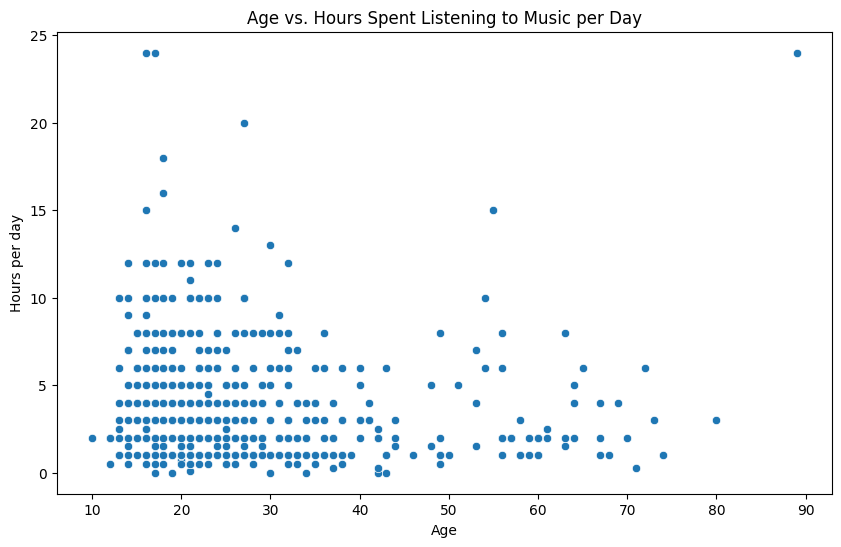

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Hours per day', data=data)
plt.title('Age vs. Hours Spent Listening to Music per Day')
plt.xlabel('Age')
plt.ylabel('Hours per day')
plt.show()

**Observations**

- There is no clear correlation between a respondent's age and the amount of time they spend listening to music.

### 5. Relationship between Favorite Genre and mental health box plots

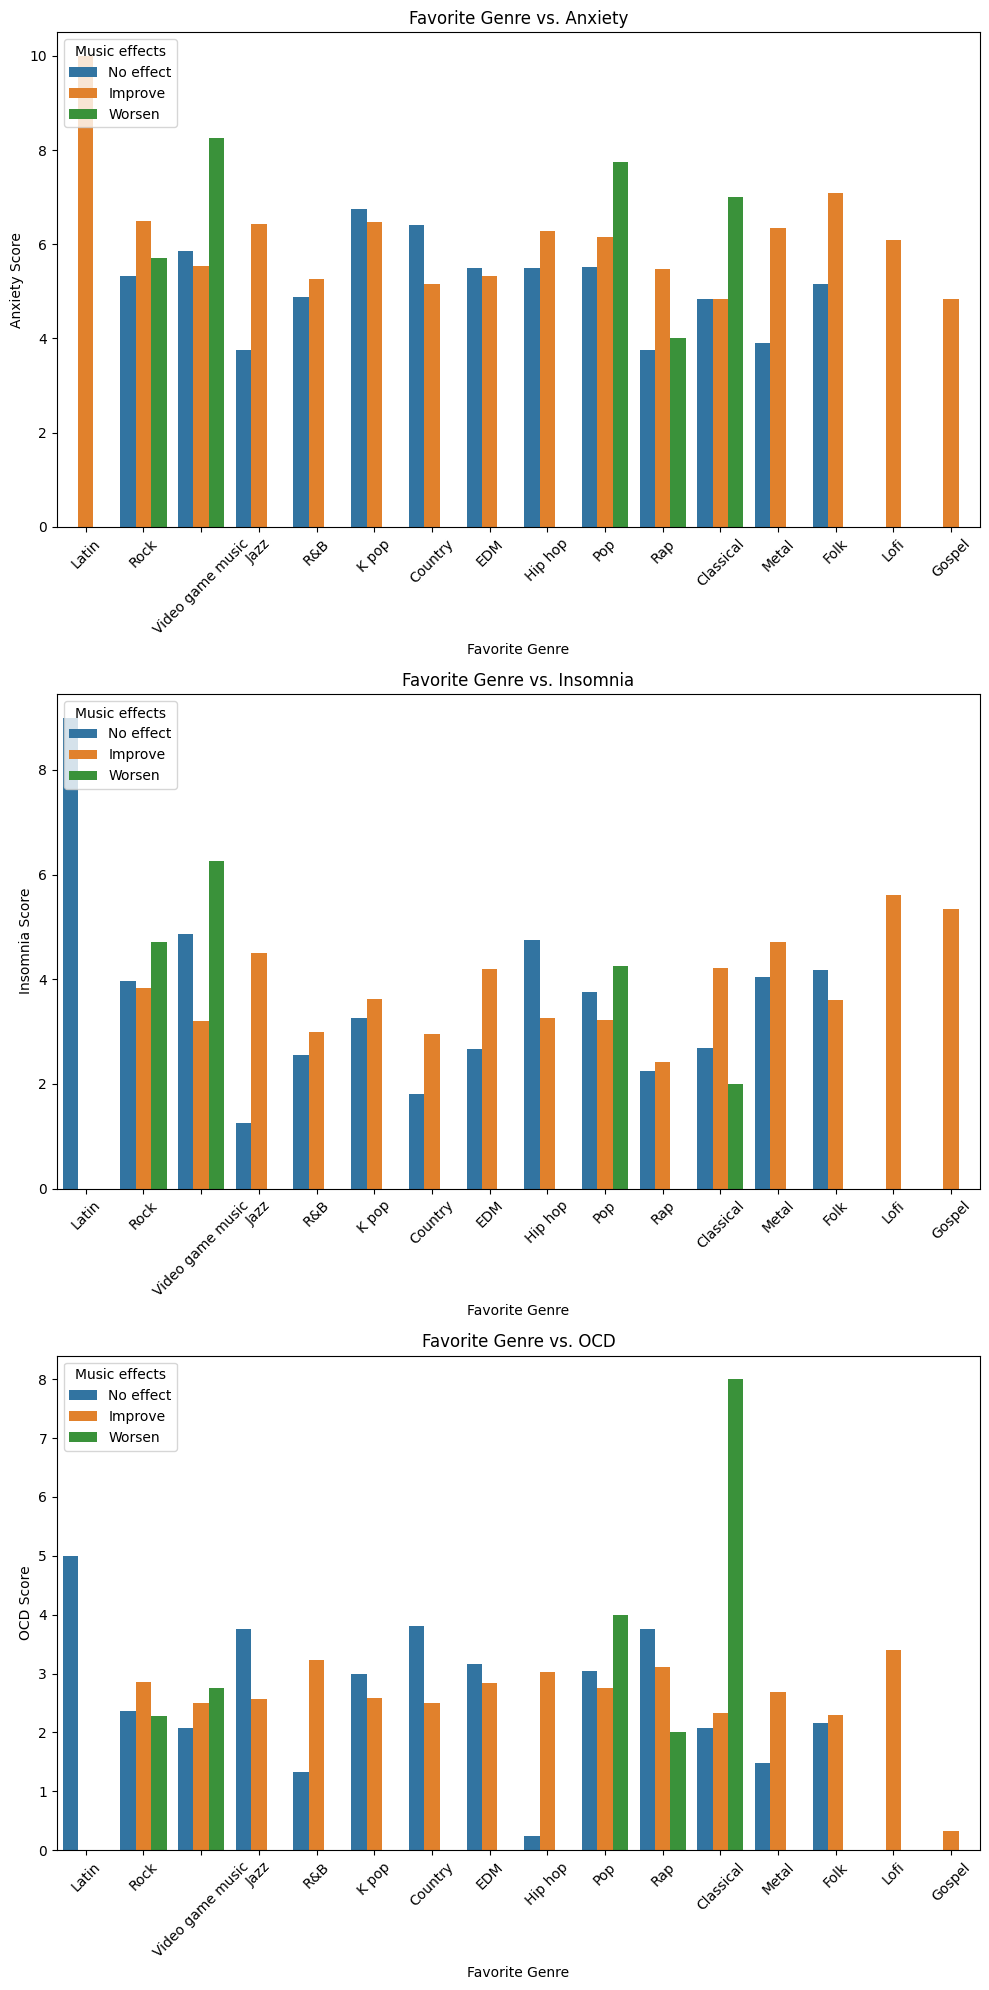

In [10]:
# Set up the subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 20))

# Bar Plot for Anxiety vs Favorite Genre
sns.barplot(ax=axes[0], data=data, x='Fav genre', y='Anxiety', hue='Music effects', errwidth=0)
axes[0].set_title('Favorite Genre vs. Anxiety')
axes[0].set_xlabel('Favorite Genre')
axes[0].set_ylabel('Anxiety Score')
axes[0].tick_params(axis='x', rotation=45)

# Bar Plot for Insomnia vs Favorite Genre
sns.barplot(ax=axes[1], data=data, x='Fav genre', y='Insomnia', hue='Music effects',errwidth=0)
axes[1].set_title('Favorite Genre vs. Insomnia')
axes[1].set_xlabel('Favorite Genre')
axes[1].set_ylabel('Insomnia Score')
axes[1].tick_params(axis='x', rotation=45)

# Bar Plot for OCD vs Favorite Genre
sns.barplot(ax=axes[2], data=data, x='Fav genre', y='OCD', hue='Music effects',errwidth=0)
axes[2].set_title('Favorite Genre vs. OCD')
axes[2].set_xlabel('Favorite Genre')
axes[2].set_ylabel('OCD Score')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Observartions**
- Rock, Video Game Music, Pop, and Classical genres correlate with higher depression levels.
- Among these, Video Game Music listeners report the highest anxiety and insomnia levels.
- Rap listeners also exhibit elevated anxiety levels.


# Statistical Testing and Analysis

### ANOVA

#### Assumptions
- Normality: The dependent variable (depression scores) should be approximately normally distributed within each group.
- Independence: Observations within and across groups should be independent of each other.

In [11]:

# Extract unique favorite genres
unique_genres = data['Fav genre'].unique()

# Create a list to store the depression scores for each genre
genre_depression_scores = []

# Populate the list with depression scores for each genre
for genre in unique_genres:
    genre_depression_scores.append(data[data['Fav genre'] == genre]['Depression'])

# Perform one-way ANOVA
statistic, p_value = stats.f_oneway(*genre_depression_scores)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print(f'Reject the null hypothesis. There is a significant difference in depression scores among favorite genres (p-value: {p_value:.4f}).')
else:
    print(f'Fail to reject the null hypothesis. There is no significant difference in depression scores among favorite genres (p-value: {p_value:.4f}).')


Reject the null hypothesis. There is a significant difference in depression scores among favorite genres (p-value: 0.0196).


In [12]:
target = "Depression"
# Perform ANOVA test using starts models library
formula = f'{target} ~ Age + Q("Hours per day") + BPM + Anxiety + Insomnia + OCD'
model_ANOVA = ols(formula, data=data).fit()
anova_results = anova_lm(model_ANOVA)

# Display ANOVA results
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
Age,1.0,41.559172,41.559172,6.969954,8.496916e-03
"Q(""Hours per day"")",1.0,51.561652,51.561652,8.647486,3.396826e-03
BPM,1.0,6.915270,6.915270,1.159771,2.819306e-01
Anxiety,1.0,1545.917503,1545.917503,259.268265,5.117720e-49
Insomnia,1.0,301.260848,301.260848,50.524932,3.238092e-12
OCD,1.0,14.523142,14.523142,2.435699,1.191096e-01
Residual,622.0,3708.748104,5.962618,NaN,NaN


**Observations**

1. Significant Factors:
    Anxiety, Insomnia, Age, and Hours per day have a significant impact on depression scores.

2. Non-Significant Factor:
    BPM (Beats per minute) of the favorite genre does not significantly affect depression scores.

3. OCD's Impact:
    OCD (Obsessive-Compulsive Disorder) does not show statistical significance.

### Chi-square Testing with Contingency Table

In [13]:
# Create a contingency table
contingency_table = pd.crosstab(data['Fav genre'], data['Music effects'])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Interpret the results
print(f'Chi-square Statistic: {chi2_stat}')
print(f'p-value: {p_val}')
print(f'Degrees of Freedom: {dof}')
print(f'Expected Frequencies: \n{expected}')

Chi-square Statistic: 36.381127918564665
p-value: 0.19586297110829864
Degrees of Freedom: 30
Expected Frequencies: 
[[3.94587912e+01 1.23035714e+01 1.23763736e+00]
 [1.86126374e+01 5.80357143e+00 5.83791209e-01]
 [2.68021978e+01 8.35714286e+00 8.40659341e-01]
 [2.15906593e+01 6.73214286e+00 6.77197802e-01]
 [4.46703297e+00 1.39285714e+00 1.40109890e-01]
 [2.60576923e+01 8.12500000e+00 8.17307692e-01]
 [1.48901099e+01 4.64285714e+00 4.67032967e-01]
 [1.71236264e+01 5.33928571e+00 5.37087912e-01]
 [1.48901099e+00 4.64285714e-01 4.67032967e-02]
 [7.44505495e+00 2.32142857e+00 2.33516484e-01]
 [6.55164835e+01 2.04285714e+01 2.05494505e+00]
 [8.48736264e+01 2.64642857e+01 2.66208791e+00]
 [2.60576923e+01 8.12500000e+00 8.17307692e-01]
 [1.63791209e+01 5.10714286e+00 5.13736264e-01]
 [1.38478022e+02 4.31785714e+01 4.34340659e+00]
 [3.27582418e+01 1.02142857e+01 1.02747253e+00]]


**Observations**

- Chi-square Statistic (36.38): This statistic tests the null hypothesis that the two categorical variables are independent. A higher value indicates a stronger relationship between the variables.

- p-value (0.196): The p-value is relatively high (greater than the typical significance level of 0.05). This suggests that there is no strong evidence to reject the null hypothesis. The variables 'Favorite Genre' and 'Music effects' may be independent.

- Degrees of Freedom (30)

# Predictive Model

## Data Preprocessing

In [14]:
# Convert categorical column to numeric
for c in ["Fav genre"]:
    en = LabelEncoder()
    data[c] = en.fit_transform(data[c])


## Train and Evaluate the Model

In [15]:
# Define features and target
features = ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Insomnia', 'OCD',"Fav genre"]
target = 'Depression'

# Preprocessing
train_data = data.dropna()
X = train_data[features]
y = train_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)  # You can use a different model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 2.044072580645161


## Plot feature importances in determining Depression levels


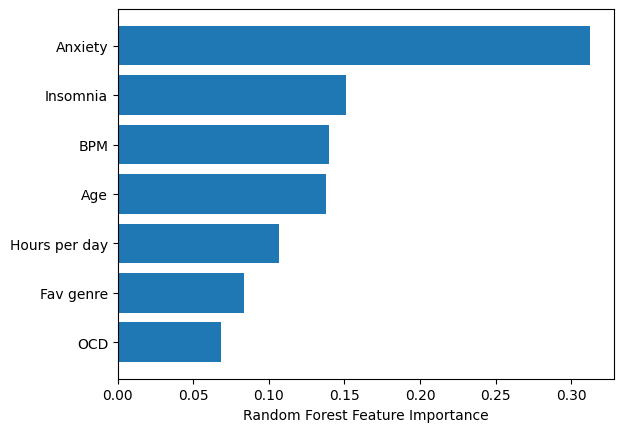

In [16]:
feature_importances = model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

**Observations**

- Anxiety (31.27%): Strongest predictor of depression.
- Insomnia (15.11%): Significantly impacts depression levels.
- BPM (13.97%): Music tempo influences reported depression.
- Age (13.79%): Age-related correlation with depression.
- Hours per day (10.66%): Music exposure duration matters.
- Favorite Genre (8.37%): Musical preference has a moderate impact.
- OCD (6.83%): OCD presence is a minor predictor.

These observations highlight key factors influencing reported depression levels based on the provided feature importances from the regression tree

# Summary
Key findings include:

- The campaign effectively targets young individuals, with a significant portion of respondents falling in the 15 to 30-year-old age range.

- Spotify emerges as the dominant choice for primary streaming service, with approximately 62.1% of users preferring it. Apple Music and YouTube Music follow, accounting for 6.9% and 12.8% of users respectively. Other platforms like Pandora and non-users make up the rest.

In the predictive model for depression, feature importance analysis revealed the following:

- Anxiety (31.27%) emerges as the strongest predictor of reported depression levels, underscoring the significant impact of anxiety on mental health.

- Insomnia (15.11%) follows closely, signifying its substantial influence on reported depression levels.

- BPM (13.97%) suggests that the tempo or rhythm of preferred music plays a noteworthy role in predicting depression.

- Age (13.79%) exhibits a correlation with reported depression, emphasizing the relevance of age in understanding mental health.

- Hours per day (10.66%) indicates that the duration of music exposure while working holds relevance in predicting depression.

- Favorite Genre (8.37%) demonstrates a moderate impact, suggesting that musical preference contributes to an individual's mental health.

- OCD (6.83%) although with the lowest importance, still contributes to predicting depression, highlighting its relevance in mental health assessment.